### Libraries

In [ ]:
from sklearn.datasets import load_diabetes # loading sklearn for diabetes dataset
import pandas as pd # importing pandas for data operation 
import seaborn as sns # import seaborn for visualization
import matplotlib.pyplot as plt # import matplotlib for visualization
from sklearn.cluster import KMeans # import Kmeans clustering from sklearn

### Loading data

In [40]:
df = load_diabetes(return_X_y=False, as_frame=False, scaled=False) # loading dataset
df_data = pd.DataFrame(df.data,columns=df.feature_names) # feature data
df_data.rename(columns={'s1':'tc','s2':'ldl','s3':'hdl','s4':'tch','s5':'ltg','s6':'glu'},inplace=True) # changing columns name for convenience
df_target = pd.DataFrame(df.target) # target variable
df_target.rename(columns={0:'bg'}, inplace =True) # changing column name for convenience
df_main = pd.concat([df_data,df_target],axis=1) # concatenating feature and target dataset
df_main
num_data = df_main.drop('sex',axis=1) # dataset which exclude 'sex' column.

In [41]:
df_main['sex'].replace(1.0, 'Female', inplace=True) # taking 1 as Female
df_main['sex'].replace(2.0, 'Male', inplace=True) # taking 2 as Male

C:\Users\GPU\AppData\Local\Temp\ipykernel_10180\2452584266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['sex'].replace(1.0, 'Female', inplace=True) # taking 1 as Female


In [42]:
df_main

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
0,59.0,Male,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,Female,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,Male,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,Female,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,Female,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,Male,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,Male,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,Male,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,Female,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [43]:
num_data

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
0,59.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


### EDA

In [44]:
num_data.corr() # checking correlation between features

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
age,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
bmi,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
tc,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
ldl,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
hdl,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
ltg,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
glu,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
bg,0.187889,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


<Axes: >

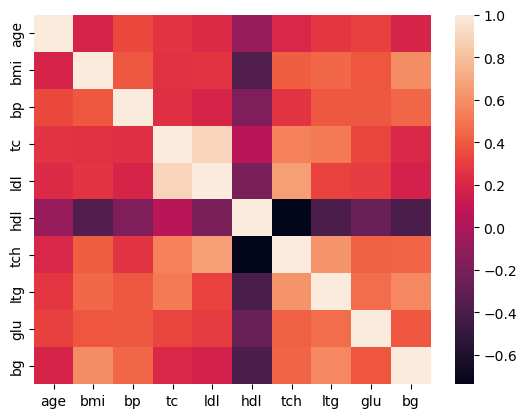

In [45]:
sns.heatmap(num_data.corr()) # Heatmap visualization on dataset 

In [46]:
num_data.describe() # description of the data

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


* The columns for age, blood pressure (BP), and log serum triglycerides (LTG) are outlier-free

* There are 3 outliers observed in the BMI column however, the data generally shows a strong positive correlation between higher BMI and an increased risk of diabetes progression within one year.

* Total serum cholesterol and LDL (low-density lipoprotein) exhibit a high correlation. Furthermore, the outliers for both features are observed in similar patients.

* The outliers for blood glucose level are acceptable, as high blood glucose levels indicate a high risk of diabetes progression within one year.

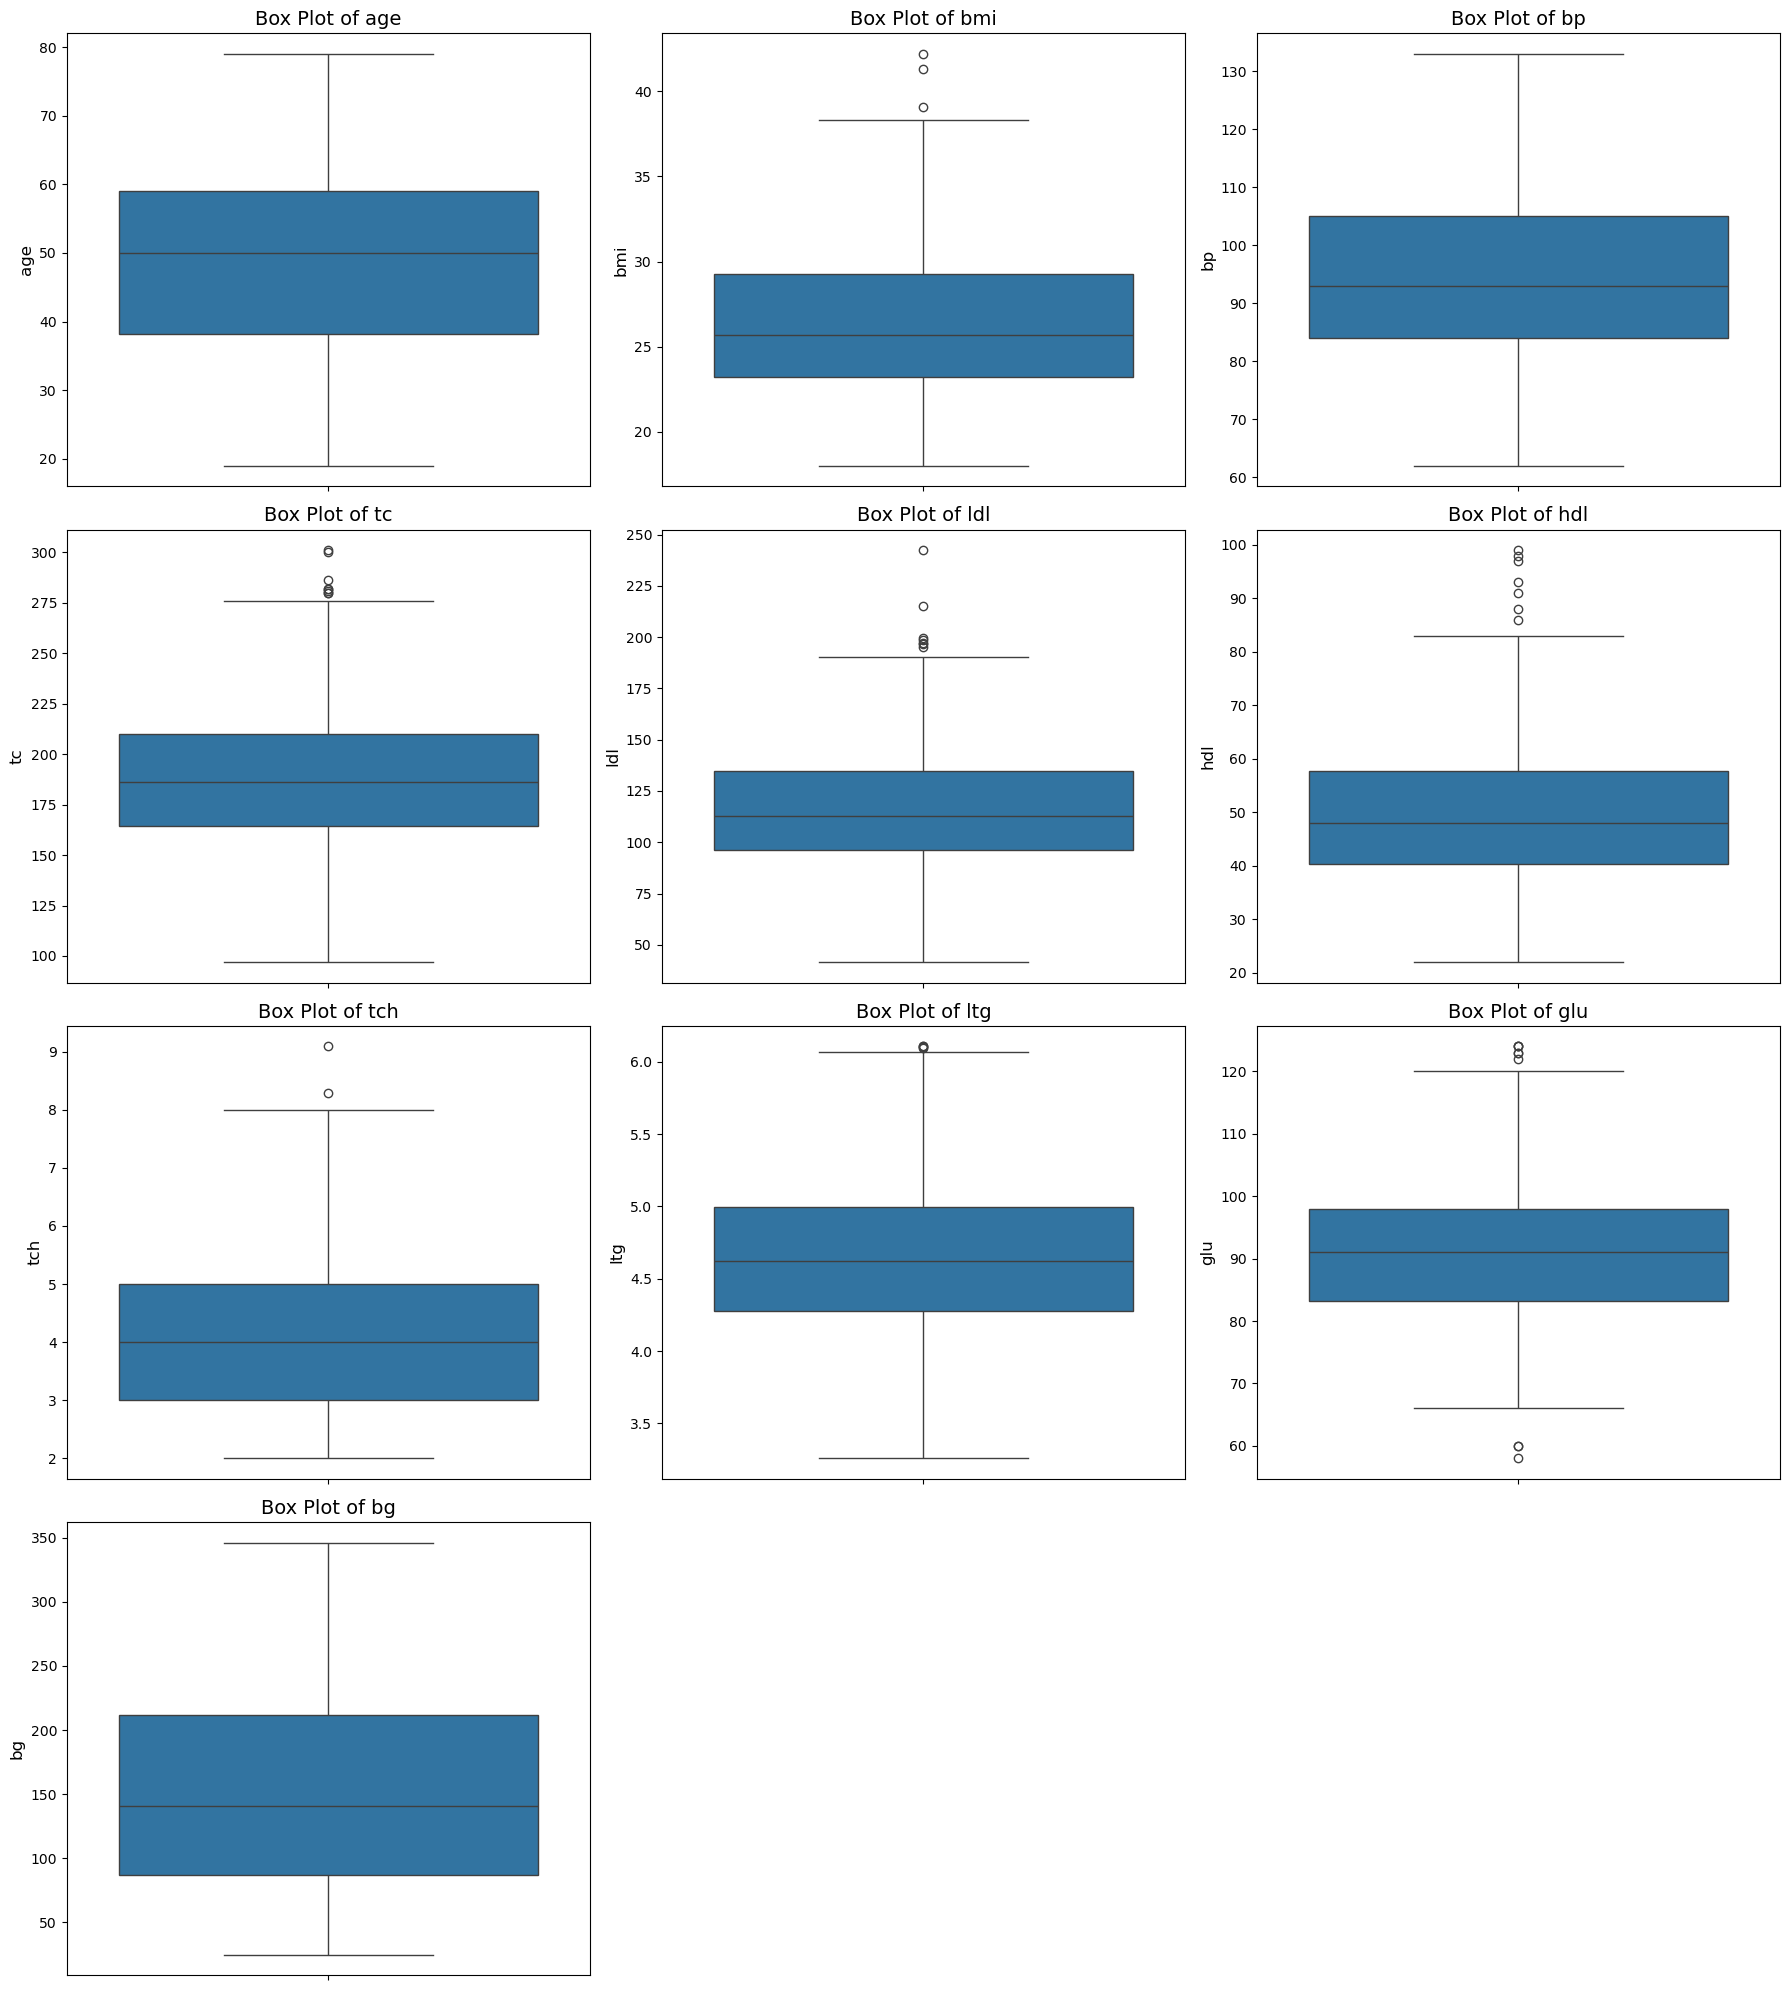

In [47]:
num_cols = 3 # number of columns in subplot
num_rows = 4 # number of rows in subplot
name_cols = num_data.columns # names of the columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows)) 
axes = axes.flatten()
for i, col in enumerate(name_cols):
    sns.boxplot(y=num_data[col], ax=axes[i])
    axes[i].set_ylabel(col,size=12) # ylabel for each plot
    axes[i].set_title(f'Box Plot of {col}',size=14) # title of each plot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) # just to beautify the plots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'progressive blood glucose risk')

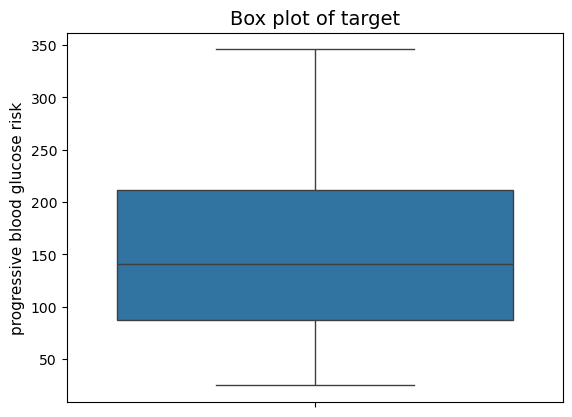

In [48]:
plt.title("Box plot of target",size=14)
sns.boxplot(df_main['bg'])
plt.ylabel("progressive blood glucose risk",size=11)

In [49]:
def outlier(column):
    Q1 = df_main[column].quantile(0.25)
    Q3 = df_main[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_main[(df_main[column] < lower_bound) | (df_main[column] > upper_bound)]
    return outliers

In [50]:
outlier('bmi')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
256,35.0,Female,41.3,81.0,168.0,102.8,37.0,5.0,4.9488,94.0,346.0
366,36.0,Male,39.1,90.0,219.0,135.8,38.0,6.0,5.4205,103.0,233.0
367,46.0,Male,42.2,99.0,211.0,137.0,44.0,5.0,5.0106,99.0,242.0


In [51]:
df_main[df_main['bmi']>35] # data for bmi greater than 35

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
32,58.0,Male,38.0,103.0,150.0,107.2,22.0,7.00,4.6444,98.0,341.0
114,55.0,Female,36.6,113.0,199.0,94.4,43.0,4.63,5.7301,97.0,258.0
130,31.0,Male,35.3,125.0,187.0,112.4,48.0,4.00,4.8903,109.0,274.0
138,58.0,Male,36.7,117.0,166.0,93.8,44.0,4.00,4.9488,109.0,336.0
145,37.0,Female,38.3,113.0,165.0,94.6,53.0,3.00,4.4659,79.0,259.0
215,56.0,Male,35.1,123.0,164.0,95.0,38.0,4.00,5.0434,117.0,263.0
251,34.0,Male,35.5,120.0,233.0,146.6,34.0,7.00,5.5683,101.0,243.0
256,35.0,Female,41.3,81.0,168.0,102.8,37.0,5.00,4.9488,94.0,346.0
262,44.0,Male,38.2,123.0,201.0,126.6,44.0,5.00,5.0239,92.0,308.0
327,69.0,Female,37.0,103.0,207.0,131.4,55.0,4.00,4.6347,90.0,237.0


In [52]:
outlier('tc')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
123,50.0,Male,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0,84.0
161,36.0,Male,32.3,115.00,286.0,199.4,39.0,7.00,5.4723,112.0,217.0
202,71.0,Male,26.5,105.00,281.0,173.6,55.0,5.00,5.5683,84.0,196.0
230,38.0,Male,33.0,78.00,301.0,215.0,50.0,6.02,5.1930,108.0,220.0
248,37.0,Female,30.8,112.00,282.0,197.2,43.0,7.00,5.3423,101.0,258.0
276,52.0,Female,28.8,113.00,280.0,174.0,67.0,4.00,5.2730,86.0,283.0
287,61.0,Female,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0,219.0
346,50.0,Male,28.0,104.00,282.0,196.8,44.0,6.00,5.3279,95.0,139.0


In [53]:
outlier('ldl')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
123,50.0,Male,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0,84.0
161,36.0,Male,32.3,115.00,286.0,199.4,39.0,7.00,5.4723,112.0,217.0
230,38.0,Male,33.0,78.00,301.0,215.0,50.0,6.02,5.1930,108.0,220.0
248,37.0,Female,30.8,112.00,282.0,197.2,43.0,7.00,5.3423,101.0,258.0
287,61.0,Female,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0,219.0
346,50.0,Male,28.0,104.00,282.0,196.8,44.0,6.00,5.3279,95.0,139.0
376,48.0,Female,32.7,93.00,276.0,198.6,43.0,6.42,5.1475,91.0,121.0


In [54]:
df_main[df_main['ldl']>190]

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
123,50.0,Male,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0,84.0
161,36.0,Male,32.3,115.00,286.0,199.4,39.0,7.00,5.4723,112.0,217.0
230,38.0,Male,33.0,78.00,301.0,215.0,50.0,6.02,5.1930,108.0,220.0
248,37.0,Female,30.8,112.00,282.0,197.2,43.0,7.00,5.3423,101.0,258.0
287,61.0,Female,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0,219.0
346,50.0,Male,28.0,104.00,282.0,196.8,44.0,6.00,5.3279,95.0,139.0
376,48.0,Female,32.7,93.00,276.0,198.6,43.0,6.42,5.1475,91.0,121.0
414,71.0,Male,27.0,93.33,269.0,190.2,41.0,6.56,5.2417,93.0,131.0


In [55]:
outlier('hdl')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
35,62.0,Male,23.5,80.33,225.0,112.8,86.0,2.62,4.8752,96.0,102.0
58,60.0,Female,20.4,105.00,198.0,78.4,99.0,2.00,4.6347,79.0,170.0
260,60.0,Female,25.6,78.00,195.0,95.4,91.0,2.00,3.7612,87.0,39.0
261,62.0,Female,22.5,125.00,215.0,99.0,98.0,2.00,4.4998,95.0,103.0
269,51.0,Female,23.4,87.00,220.0,108.8,93.0,2.00,4.5109,82.0,87.0
286,38.0,Female,21.3,72.00,165.0,60.2,88.0,2.00,4.4308,90.0,60.0
441,36.0,Female,19.6,71.00,250.0,133.2,97.0,3.00,4.5951,92.0,57.0


In [56]:
outlier('tch')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
123,50.0,Male,29.6,94.33,300.0,242.4,33.0,9.09,4.8122,109.0,84.0
322,55.0,Male,32.1,112.67,207.0,92.4,25.0,8.28,6.1048,111.0,242.0


In [57]:
outlier('glu')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg
23,61.0,Male,32.0,103.67,210.0,85.2,35.0,6.00,6.1070,124.0,245.0
84,49.0,Female,22.7,65.33,168.0,96.2,62.0,2.71,3.8918,60.0,65.0
117,65.0,Female,24.4,120.00,222.0,135.6,37.0,6.00,5.5094,124.0,281.0
141,41.0,Female,30.8,81.00,214.0,152.0,28.0,7.60,5.1358,123.0,317.0
168,49.0,Male,31.9,94.00,234.0,155.8,34.0,7.00,5.3982,122.0,268.0
245,41.0,Female,23.1,86.00,148.0,78.0,58.0,3.00,4.0943,60.0,125.0
350,41.0,Male,32.0,126.00,198.0,104.2,49.0,4.00,5.4116,124.0,243.0
406,33.0,Female,18.9,70.00,162.0,91.8,59.0,3.00,4.0254,58.0,72.0
428,62.0,Male,34.6,120.00,215.0,129.2,43.0,5.00,5.3660,123.0,310.0


# All about total serum cholesterol, lipoproteins, high-density lipoproteins, total cholesterol & triglycerides

#### To better understand how our blood glucose risk is influenced by various factors, we need to:

#### Identify the features involved: 
1. What specific measurements and characteristics provide insights into our blood sugar levels and overall diabetes risk?

2. Analyze their relationships: How do these features interact and influence one another in relation to blood glucose regulation?

3. Determine preventative steps: Based on these understandings, what actions can we take to reduce our diabetes risk?

##### TC : Total serum cholesterol : Serum cholesterol, or total blood cholesterol, measures the amount of certain lipids in your blood

Your total blood (serum) cholesterol breaks down into three key types of fats:

1. Low-density lipoprotein (LDL), often called "bad" cholesterol, contributes to plaque buildup in your arteries.

2. High-density lipoprotein (HDL), or "good" cholesterol, helps prevent this arterial plaque from forming.

3. Triglycerides.

##### Lipoproteins are essentially your body's transport system for fats (lipids) and proteins, allowing them to travel through your bloodstream. Since fats and blood don't mix on their own, these clever combinations make sure essential lipids get where they need to go. 
#### There are two main types you'll hear about: LDL and HDL. While both carry cholesterol, they play very different roles in your health.

- LDL: The "Bad" Cholesterol Carrier:

  LDL, or low-density lipoprotein, often gets called the "bad" cholesterol. That's because high levels of it can lead to cholesterol building up in your arteries. Over time, this buildup can narrow your arteries, making it harder for blood to flow and raising your risk of heart problems.

- HDL: The "Good" Cholesterol Carrier

 On the flip side, HDL, or high-density lipoprotein, is considered the "good" cholesterol. Its job is to collect excess cholesterol from around your body and bring it back to your liver. Once there, your liver can remove that cholesterol from your system, which helps keep your arteries clear.

- TCH: Total Cholesterol
  
  It represents the overall amount of cholesterol present in your blood. It's a key indicator of cardiovascular health. 

- LTG: possibly log of serum triglycerides
  
  Similar to other fats, triglycerides in your blood can also cause fatty material to build up in your arteries.

 

Source : https://medlineplus.gov/ldlthebadcholesterol.html, https://www.healthline.com/health/serum-cholesterol

---------------------------------------------------------------------------------------

### Analyzing which factors are affecting the risk for blood glucose progression.

- Most of the features in our data exhibit a normal distribution, with the exception of 'total cholesterol'.

- The dataset shows a nearly even split between the male and female populations, with 235 females and 207 males recorded.


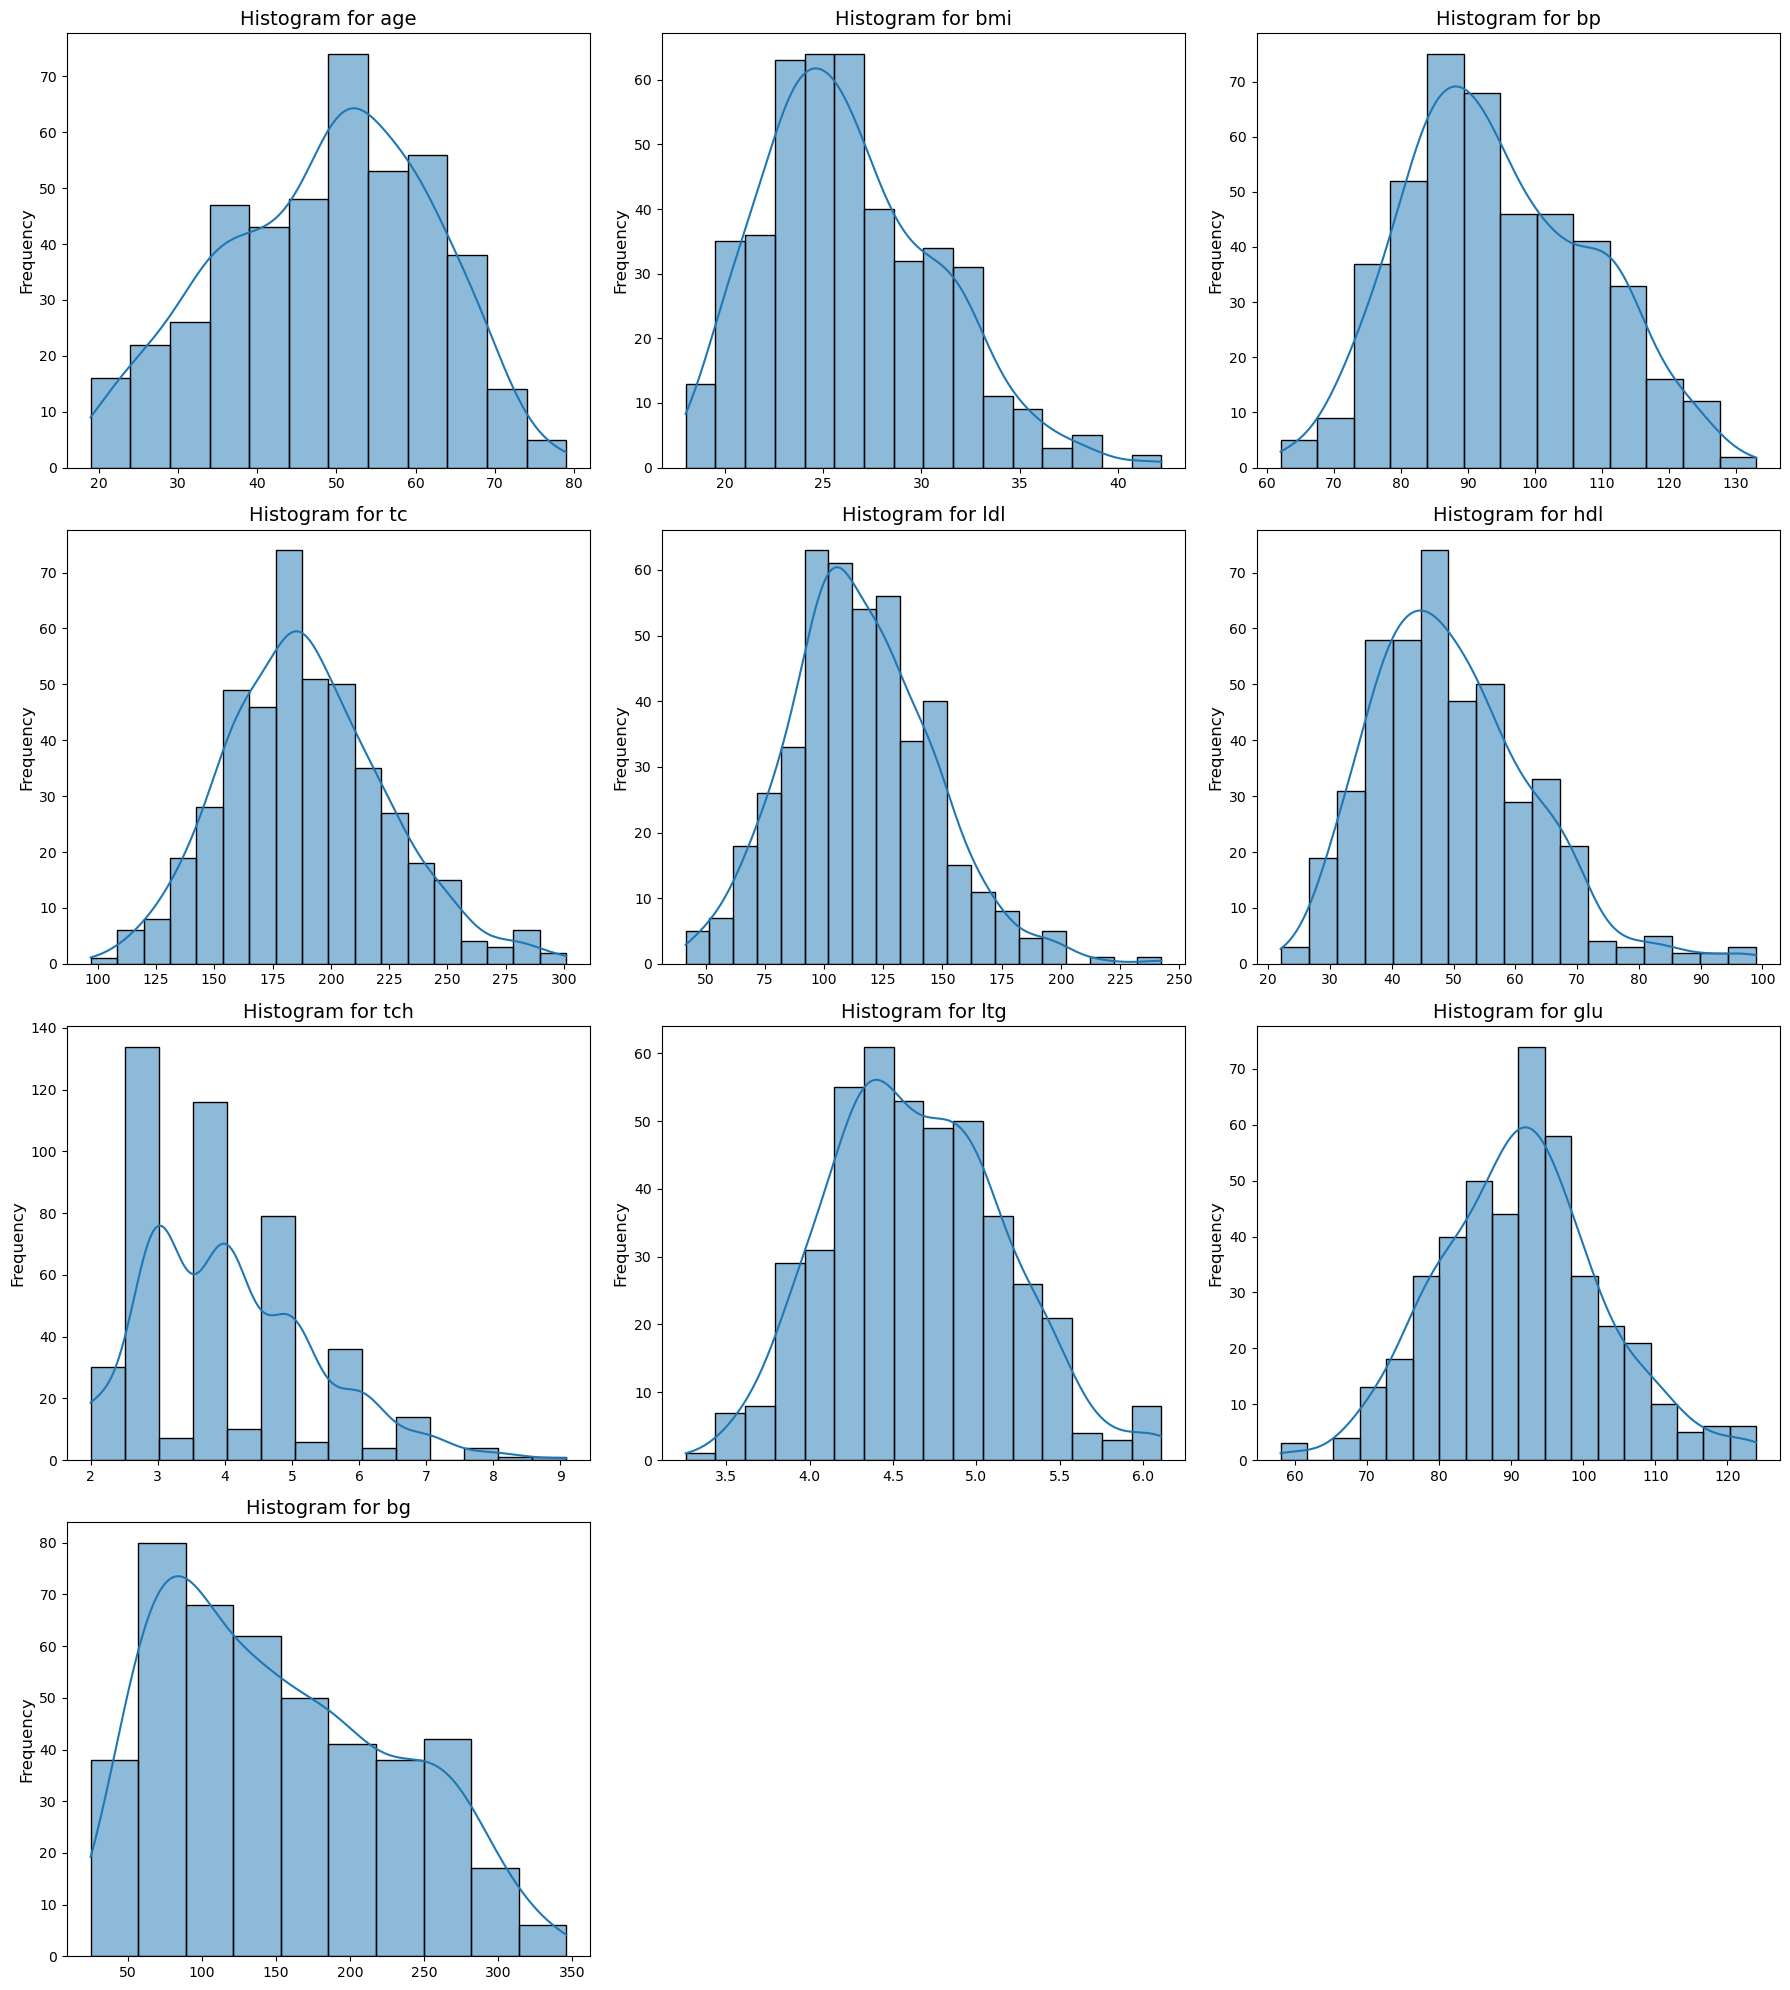

In [58]:
num_cols = 3 # number of columns in subplot
num_rows = 4 # number of rows in subplot
name_cols = num_data.columns # names of the columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows)) 
axes = axes.flatten()
for i, col in enumerate(name_cols):
    sns.histplot(num_data[col], kde=True, ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', size=12) # y label as Frequency
    axes[i].set_title(f'Histogram for {col}', size=14) # title of each plot

for j in range(len(name_cols), len(axes)):
    fig.delaxes(axes[j]) # beautify the figure
plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

In [59]:
df_main['sex'].value_counts()

sex
Female    235
Male      207
Name: count, dtype: int64

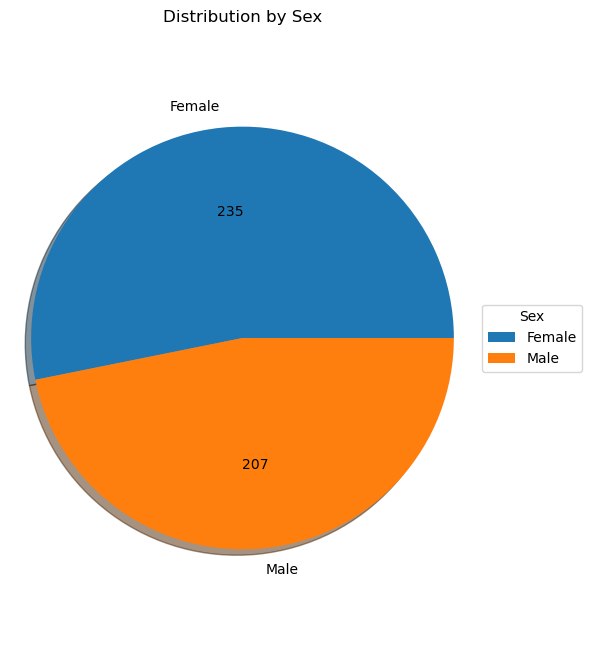

In [60]:
sex_labels = ['Female','Male'] # Get labels directly from value_counts
sex_counts = df_main['sex'].value_counts().values # Get counts
# Calculate the total count for percentage calculation
total = sum(sex_counts) 

plt.figure(figsize=(6, 8)) # Good practice to set a figure size for pie charts
plt.pie(sex_counts,
        labels=sex_labels,
        shadow=True,
        autopct=lambda p: '{:.0f}'.format(p * total / 100)
       )

plt.title('Distribution by Sex') # Add a title for clarity
plt.axis('equal') # Ensures the pie chart is circular
plt.legend(title="Sex", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1)) # Improved legend placement

plt.show()

### Bi-varient analysis

- Most features in the bivariate analysis show a positive correlation.

- We can see from the data that ltg(possibly log of serum triglycerides) correlates positively with the progressive risk on the blood glucose scale.

- Patients with high triglyceride levels face an increased risk of developing type 2 diabetes (also known as diabetes mellitus). This occurs because their bodies often become insulin resistant, meaning the hormone that
  regulates blood glucose can't function effectively. Eventually, the pancreas may reduce or stop its insulin production, preventing cells from properly utilizing glucose.


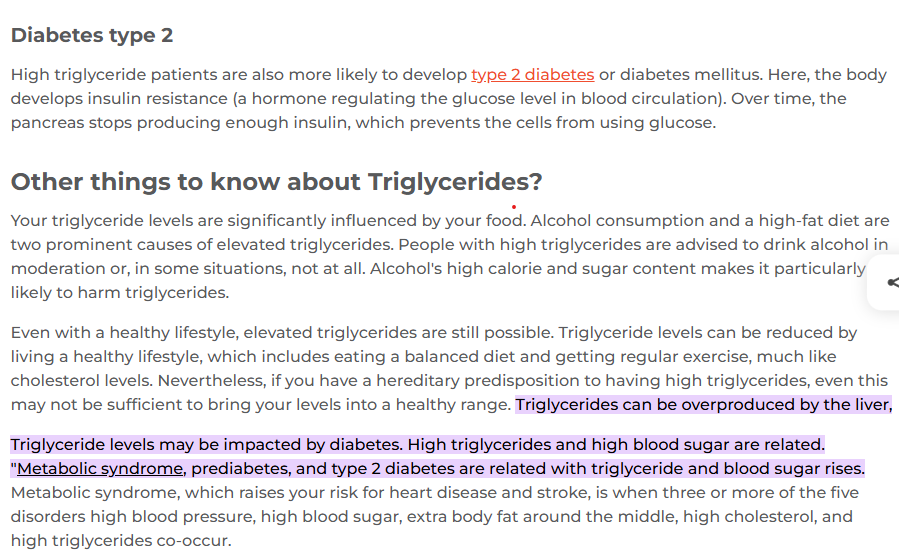

Source: https://www.medanta.org/patient-education-blog/triglycerides-and-your-health-risks-effects-and-management#:~:text=Triglycerides%20can%20be%20overproduced%20by,triglyceride%20and%20blood%20sugar%20rises.


- The data also shows that an increase in total serum cholesterol results in an increase in low-density lipoprotein (LDL).

- High-density lipoprotein (HDL), often referred to as 'good' cholesterol, is maintained at healthy levels for patients whose total cholesterol falls within the low to medium range (2-5)

In [61]:
num_data[['bmi','bg']].corr() # correlation metrics for BMI and BG(progressive risk blood glucose)

,bmi,bg
bmi,1.00000,0.58645
bg,0.58645,1.00000


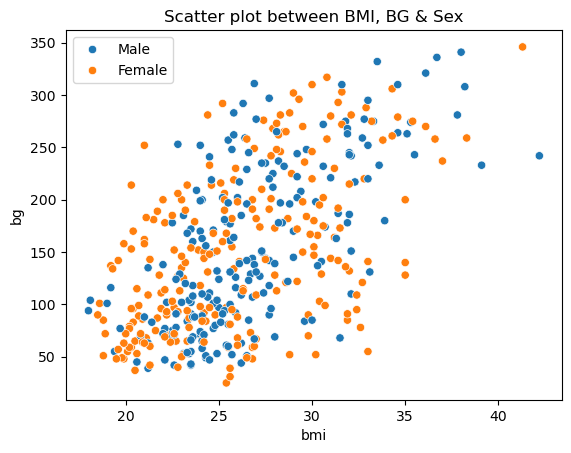

In [62]:
plt.title("Scatter plot between BMI, BG & Sex")
sns.scatterplot(x=df_main['bmi'], y=df_main['bg'], hue=df_main['sex'])
plt.legend()

In [63]:
num_data[['bp','bg']].corr() # correlation metric between blood glucose and progressive risk blood glucose

,bp,bg
bp,1.000000,0.441482
bg,0.441482,1.000000


Text(0, 0.5, 'bg')

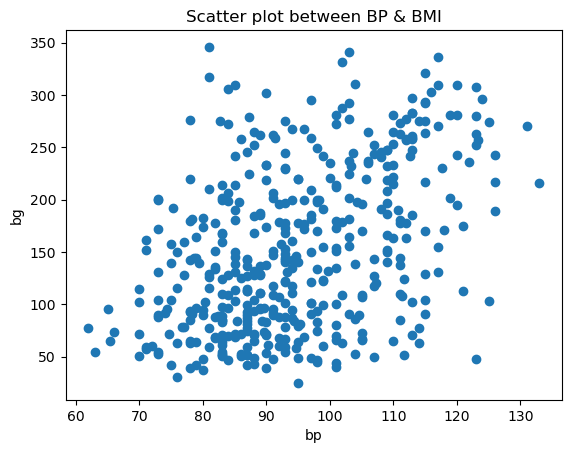

In [64]:
plt.title("Scatter plot between BP & BMI")
plt.scatter(num_data['bp'],num_data['bg']) 
plt.xlabel("bp")
plt.ylabel('bg')

Text(0, 0.5, 'bg')

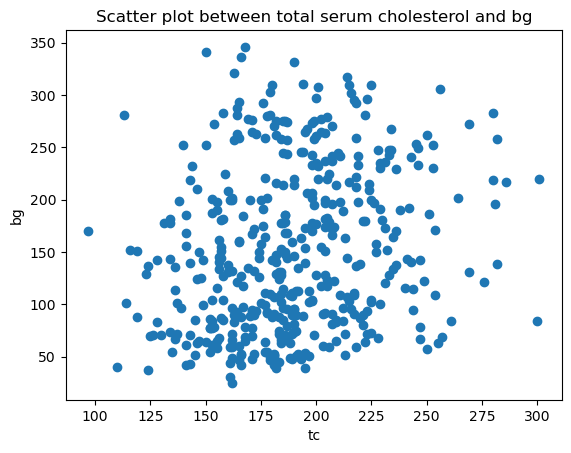

In [65]:
plt.title("Scatter plot between total serum cholesterol and bg")
plt.scatter(num_data['tc'],num_data['bg']) # scatter plot between total serum cholesterol and risk of progressive blood glucose metric
plt.xlabel("tc")
plt.ylabel("bg")

Text(0, 0.5, 'bg')

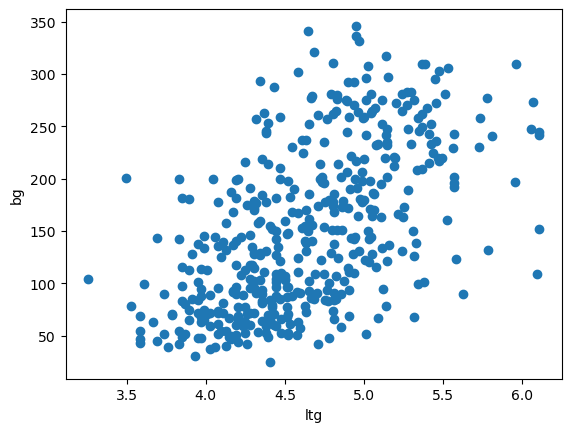

In [66]:
plt.scatter(num_data['ltg'],num_data['bg'])
plt.xlabel("scatter plot between ltg and risk of progressive blood glucose metric")
plt.xlabel("ltg")
plt.ylabel("bg")

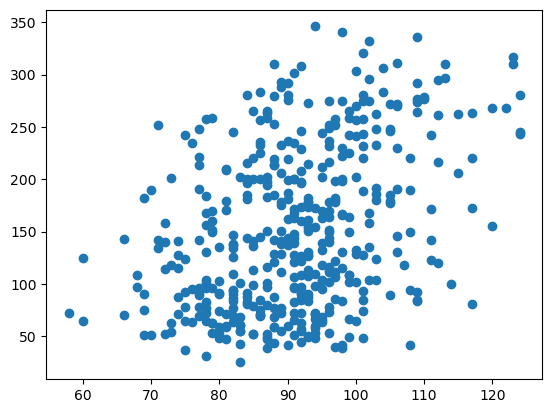

In [67]:
plt.scatter(num_data['glu'],num_data['bg'])

Text(0, 0.5, 'ldl')

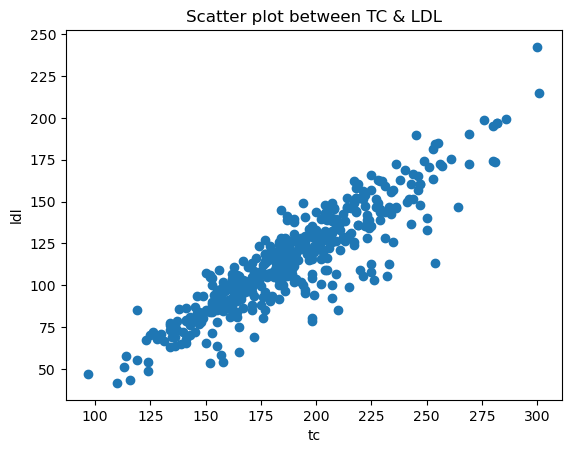

In [68]:
plt.title("Scatter plot between TC & LDL")
plt.scatter(num_data['tc'],num_data['ldl']) #scatter plot between total serum cholesterols amd low-density lipoprotiens
plt.xlabel('tc')
plt.ylabel('ldl')

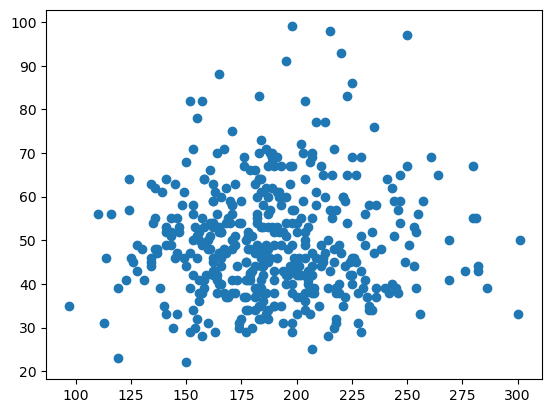

In [69]:
plt.scatter(num_data['tc'],num_data['hdl'])

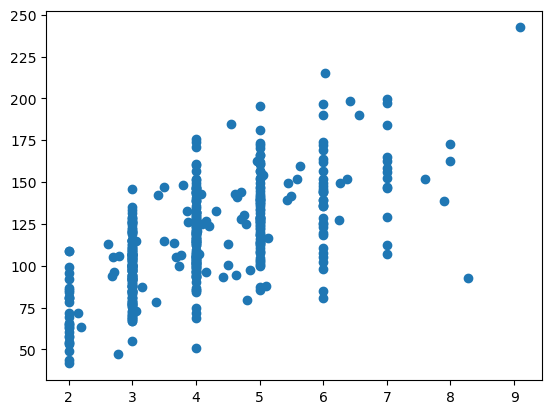

In [70]:
plt.scatter(num_data['tch'],num_data['ldl'])

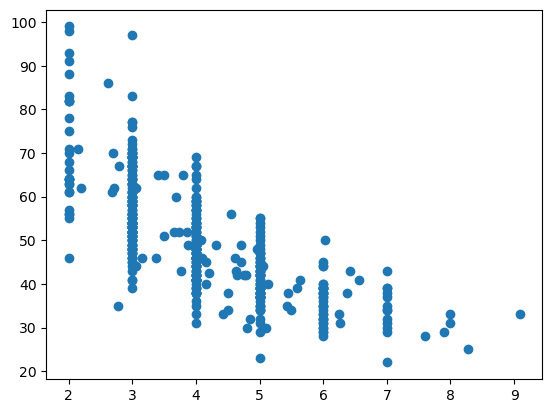

In [71]:
plt.scatter(num_data['tch'],num_data['hdl'])

## Clustering and PCA

#### Applying DBSCAN & K-Means clustering techniques to find clusters in our data

- Applying DBSCAN to our data resulted in only 1 cluster, which could be incorrect.

- We applied the Elbow method to determine the number of clusters in the dataset, it suggests a total of 3 clusters.

In [72]:
X = num_data.drop(columns={'bg'})

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
scaled = std.fit_transform(X)

dbscan = DBSCAN(metric='cosine',eps=0.7, min_samples=4)
df_main['cluster'] = dbscan.fit_predict(scaled)

In [74]:
scaled

array([[ 0.80050009,  1.29708846,  0.45984057, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -1.08218016, -0.55350458, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  0.93453324, -0.1192138 , ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984, -0.33441002,  0.36357278, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 ,  0.82123474,  0.02554979, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -1.53537419, -1.71161333, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [75]:
df_main['cluster'].value_counts()

cluster
0    442
Name: count, dtype: int64

c:\Users\GPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\GPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\GPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\GPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

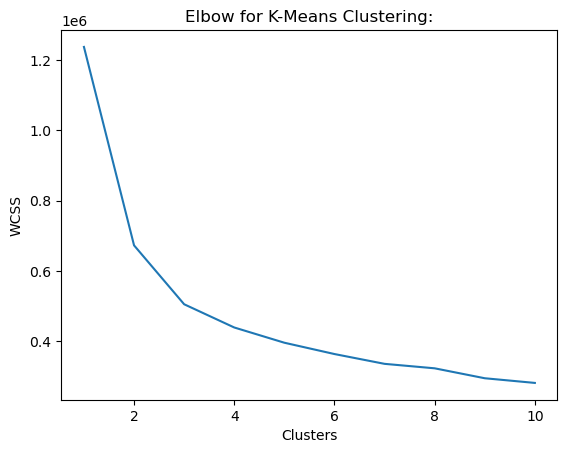

In [76]:
columns = X
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=None)
    kmeans.fit(columns)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow for K-Means Clustering:')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=None)
y_kmeans=kmeans.fit_predict(columns)

c:\Users\GPU\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [78]:
k_cluster = pd.DataFrame(y_kmeans,columns=['k_cluster'])

In [79]:
X = pd.concat([num_data,k_cluster],axis=1)

In [80]:
X

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,bg,k_cluster
0,59.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0,2
1,48.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0,1
2,72.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0,2
3,24.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0,1
4,50.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0,1
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0,1
438,47.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0,0
439,60.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0,2
440,36.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0,1


### Clustering analysis

- Cluster 0 is associated with severe total serum cholesterol, characterized by a higher LDL ratio, which clearly indicates a high risk of diabetes.

- Cluster 1 shows slightly lower total serum cholesterol, yet it still presents a somewhat elevated risk of future diabetes.

- Patients in Cluster 2 exhibit a safe total serum cholesterol level, signifying a minimal risk of blood glucose complications

<Axes: xlabel='tc', ylabel='ldl'>

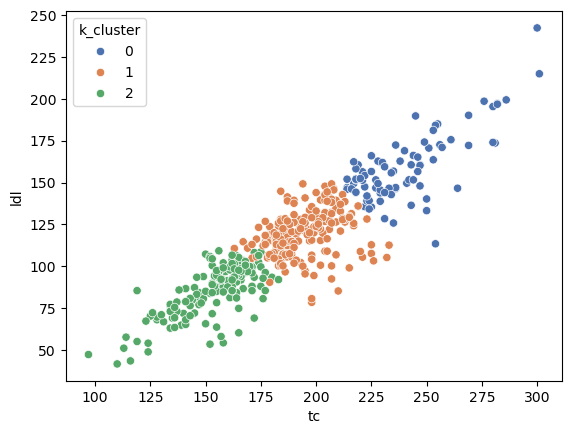

In [81]:
sns.scatterplot(x=X['tc'],y=X['ldl'],hue=X['k_cluster'],palette='deep') 

<Axes: xlabel='tc', ylabel='hdl'>

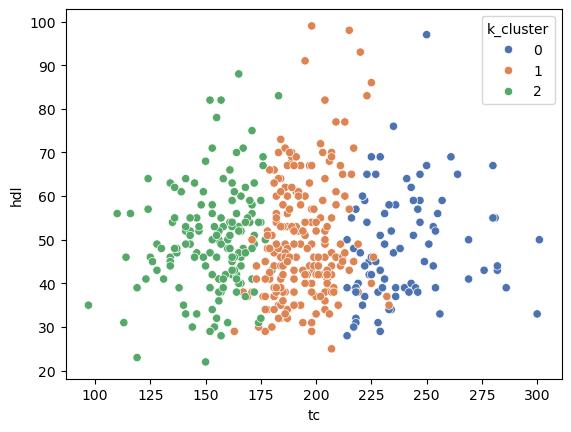

In [82]:
sns.scatterplot(x=X['tc'],y=X['hdl'],hue=X['k_cluster'],palette='deep')

<Axes: xlabel='hdl', ylabel='bg'>

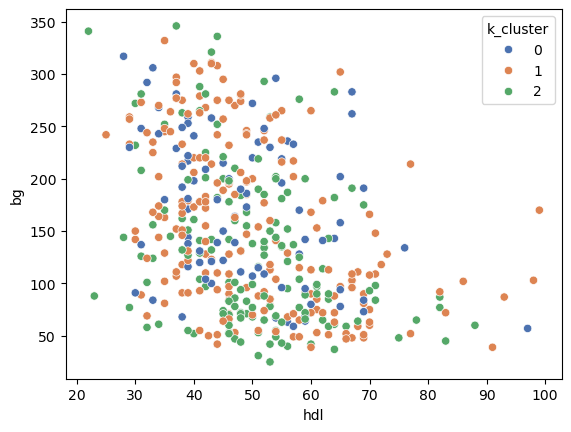

In [83]:
sns.scatterplot(x=X['hdl'],y=num_data['bg'],hue=X['k_cluster'],palette='deep')

<Axes: xlabel='bmi', ylabel='bg'>

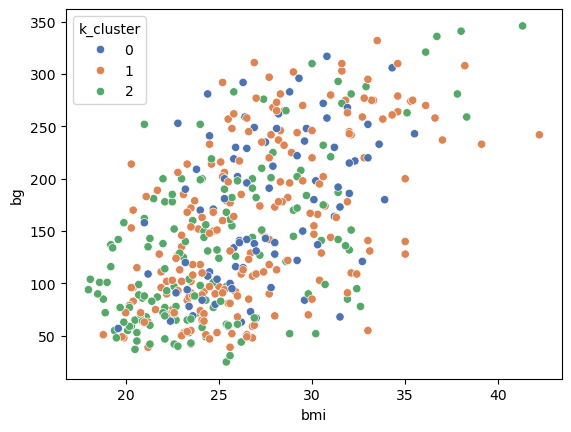

In [84]:
sns.scatterplot(x=X['bmi'],y=num_data['bg'],hue=X['k_cluster'],palette='deep')

### PCA

In [85]:
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(X) 

pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(X) 
pca_df = pd.DataFrame(data=data_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = X['k_cluster']

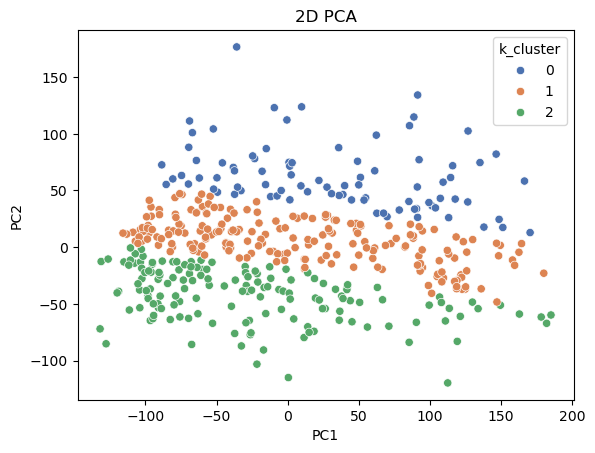

In [86]:
fig = plt.figure()

sns.scatterplot(x=data_pca_2d[:, 0], y=data_pca_2d[:, 1], hue=X['k_cluster'],palette='deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
# ax.set_zlabel('PC3')
plt.title('2D PCA')
plt.show()


In [87]:
import plotly.express as px
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',  # Use your existing 'Cluster' column for coloring
    title='3D PCA with Pre-assigned Clusters',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Plotly # Choose a color palette
)

# Optional: Customize layout for better appearance
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()

#### PNG for 3D PCA


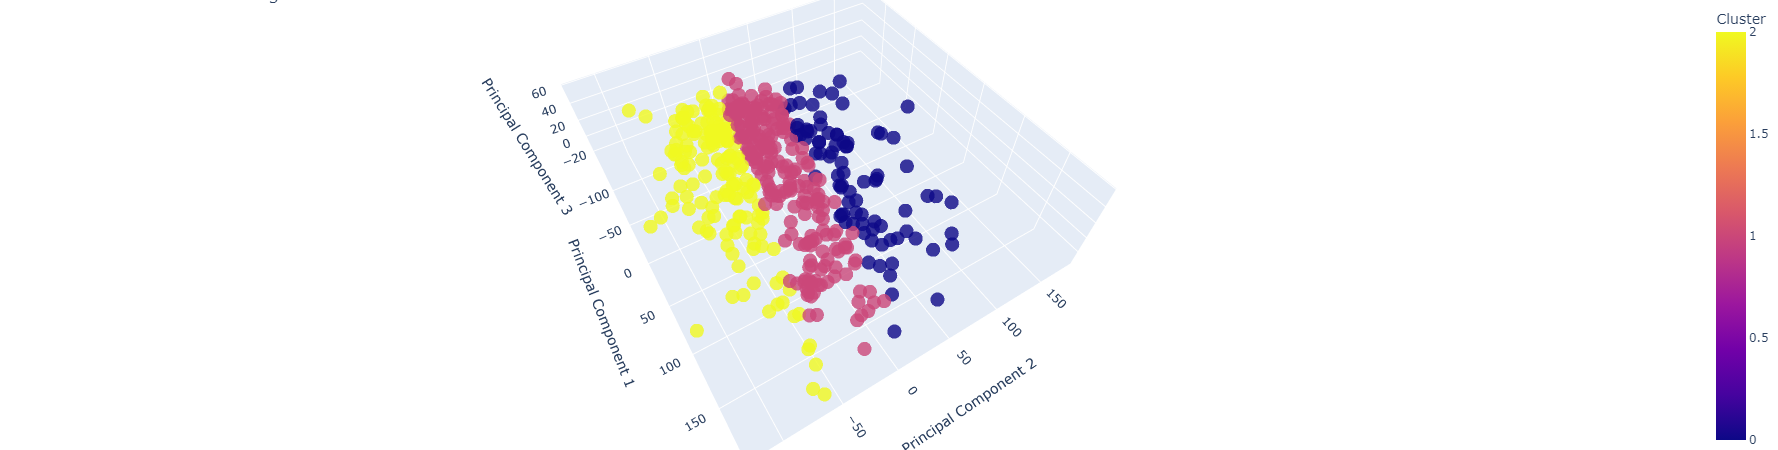